In [1]:
import pandas as pd

df = pd.read_csv("Coffe.csv")

#  basic overview info
overview = {
    "First 5 rows": df.head(),
    "Last 5 rows": df.tail(),
    "Shape": df.shape,
    "Column Names": df.columns.tolist(),
    "Data Types": df.dtypes,
    "Missing Values Count": df.isnull().sum(),
    "Unique Values Count": df.nunique()
}

overview


{'First 5 rows':    hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
 0           10      card   38.7          Latte     Morning     Fri        Mar   
 1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
 2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
 3           13      card   28.9      Americano   Afternoon     Fri        Mar   
 4           13      card   38.7          Latte   Afternoon     Fri        Mar   
 
    Weekdaysort  Monthsort        Date     Time  
 0            5          3  01/03/2024  15:50.5  
 1            5          3  01/03/2024  19:22.5  
 2            5          3  01/03/2024  20:18.1  
 3            5          3  01/03/2024  46:33.0  
 4            5          3  01/03/2024  48:14.6  ,
 'Last 5 rows':       hour_of_day cash_type  money coffee_name Time_of_Day Weekday Month_name  \
 3542           10      card  35.76  Cappuccino     Morning     Sun        Mar   
 3543     

In [2]:
# Check for missing values (already known = 0, but reconfirm)
missing_values = df.isnull().sum()

# Detect duplicate rows
duplicate_count = df.duplicated().sum()

# Identify erroneous data (e.g., negative or zero money, invalid hour_of_day)
invalid_money = df[df["money"] <= 0]
invalid_hour = df[(df["hour_of_day"] < 0) | (df["hour_of_day"] > 23)]

# Spot formatting issues: leading/trailing spaces, inconsistent casing
text_columns = df.select_dtypes(include=["object"]).columns
format_issues = {}
for col in text_columns:
    format_issues[col] = df[col].apply(lambda x: str(x).strip() != x or x != x.title()).any()

# Summarize results
data_quality_report = {
    "Missing Values (count)": missing_values,
    "Duplicate Rows (count)": duplicate_count,
    "Erroneous Money Rows": len(invalid_money),
    "Erroneous Hour_of_Day Rows": len(invalid_hour),
    "Formatting Issues Detected": format_issues
}

data_quality_report


{'Missing Values (count)': hour_of_day    0
 cash_type      0
 money          0
 coffee_name    0
 Time_of_Day    0
 Weekday        0
 Month_name     0
 Weekdaysort    0
 Monthsort      0
 Date           0
 Time           0
 dtype: int64,
 'Duplicate Rows (count)': np.int64(0),
 'Erroneous Money Rows': 0,
 'Erroneous Hour_of_Day Rows': 0,
 'Formatting Issues Detected': {'cash_type': np.True_,
  'coffee_name': np.True_,
  'Time_of_Day': np.False_,
  'Weekday': np.False_,
  'Month_name': np.False_,
  'Date': np.False_,
  'Time': np.False_}}

In [3]:
df["cash_type"] = df["cash_type"].str.strip().str.title()
df["coffee_name"] = df["coffee_name"].str.strip().str.title()

df = df.dropna()

df = df.drop_duplicates()

cleaned_format_issues = {
    "cash_type": df["cash_type"].apply(lambda x: str(x).strip() != x or x != x.title()).any(),
    "coffee_name": df["coffee_name"].apply(lambda x: str(x).strip() != x or x != x.title()).any(),
}

# Verify cleaning steps
cleaning_summary = {
    "Remaining Missing Values": df.isnull().sum().sum(),
    "Remaining Duplicates": df.duplicated().sum(),
    "Remaining Formatting Issues": cleaned_format_issues,
    "Cleaned Dataset Shape": df.shape
}

cleaning_summary


{'Remaining Missing Values': np.int64(0),
 'Remaining Duplicates': np.int64(0),
 'Remaining Formatting Issues': {'cash_type': np.False_,
  'coffee_name': np.False_},
 'Cleaned Dataset Shape': (3547, 11)}

In [4]:

desc_stats = df.describe().T

mode_values = df.mode().iloc[0]
skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)

categorical_columns = df.select_dtypes(include=["object"]).columns
value_counts = {col: df[col].value_counts().head(5) for col in categorical_columns}

# Combine results
descriptive_summary = {
    "Descriptive Statistics (Numerical)": desc_stats,
    "Mode Values": mode_values,
    "Skewness": skewness,
    "Kurtosis": kurtosis,
    "Top 5 Value Counts (Categorical)": value_counts
}

descriptive_summary


{'Descriptive Statistics (Numerical)':               count       mean       std    min    25%    50%    75%   max
 hour_of_day  3547.0  14.185791  4.234010   6.00  10.00  14.00  18.00  22.0
 money        3547.0  31.645216  4.877754  18.12  27.92  32.82  35.76  38.7
 Weekdaysort  3547.0   3.845785  1.971501   1.00   2.00   4.00   6.00   7.0
 Monthsort    3547.0   6.453905  3.500754   1.00   3.00   7.00  10.00  12.0,
 'Mode Values': hour_of_day                   10.0
 cash_type                     Card
 money                        35.76
 coffee_name    Americano With Milk
 Time_of_Day              Afternoon
 Weekday                        Tue
 Month_name                     Mar
 Weekdaysort                    2.0
 Monthsort                      3.0
 Date                    11/10/2024
 Time                       03:53.3
 Name: 0, dtype: object,
 'Skewness': hour_of_day    0.121513
 money         -0.544507
 Weekdaysort    0.082132
 Monthsort      0.004314
 dtype: float64,
 'Kurtosis': hou

In [6]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.7 MB 6.1 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/8.7 MB 4.9 MB/s eta 0:00:02
   ------------- -------------------------- 2.9/8.7 MB 4.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.7/8.7 MB 4.4 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 4.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.5/8.7 MB 4.2 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 4.1 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.7 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.0 MB/s  0:00:02

   ------------- -----------

In [7]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()
scaled_features = df[["hour_of_day", "money", "Weekdaysort", "Monthsort"]].copy()
scaled_features = pd.DataFrame(scaler.fit_transform(scaled_features), columns=scaled_features.columns)

encoded_df = df.copy()
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

transformed_df = encoded_df.copy()
for col in scaled_features.columns:
    transformed_df[col] = scaled_features[col]

transform_summary = {
    "Scaled Feature Sample": scaled_features.head(),
    "Encoded Sample": encoded_df.head(),
    "Transformed Data Shape": transformed_df.shape,
    "Encoding Columns": list(label_encoders.keys())
}

transform_summary


{'Scaled Feature Sample':    hour_of_day    money  Weekdaysort  Monthsort
 0       0.2500  1.00000     0.666667   0.181818
 1       0.3750  1.00000     0.666667   0.181818
 2       0.3750  1.00000     0.666667   0.181818
 3       0.4375  0.52381     0.666667   0.181818
 4       0.4375  1.00000     0.666667   0.181818,
 'Encoded Sample':    hour_of_day  cash_type  money  coffee_name  Time_of_Day  Weekday  \
 0           10          0   38.7            7            1        0   
 1           12          0   38.7            6            0        0   
 2           12          0   38.7            6            0        0   
 3           13          0   28.9            0            0        0   
 4           13          0   38.7            7            0        0   
 
    Month_name  Weekdaysort  Monthsort  Date  Time  
 0           7            5          3     1   910  
 1           7            5          3     1  1145  
 2           7            5          3     1  1207  
 3           7  

In [8]:
import numpy as np

outlier_summary = {}
for col in ["hour_of_day", "money"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        "Q1": Q1, "Q3": Q3, "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": len(outliers)
    }

zscore_outliers = {}
for col in ["hour_of_day", "money"]:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    z_outliers = df[z_scores > 3]
    zscore_outliers[col] = len(z_outliers)

df_capped = df.copy()
for col in ["hour_of_day", "money"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[col] = np.where(df[col] < lower_bound, lower_bound,
                              np.where(df[col] > upper_bound, upper_bound, df[col]))

outlier_report = {
    "IQR Outlier Summary": outlier_summary,
    "Z-Score Outlier Count": zscore_outliers,
    "Post-Treatment Verification": {
        "hour_of_day Range": (df_capped["hour_of_day"].min(), df_capped["hour_of_day"].max()),
        "money Range": (df_capped["money"].min(), df_capped["money"].max())
    }
}

outlier_report


{'IQR Outlier Summary': {'hour_of_day': {'Q1': np.float64(10.0),
   'Q3': np.float64(18.0),
   'IQR': np.float64(8.0),
   'Lower Bound': np.float64(-2.0),
   'Upper Bound': np.float64(30.0),
   'Outlier Count': 0},
  'money': {'Q1': np.float64(27.92),
   'Q3': np.float64(35.76),
   'IQR': np.float64(7.839999999999996),
   'Lower Bound': np.float64(16.160000000000007),
   'Upper Bound': np.float64(47.519999999999996),
   'Outlier Count': 0}},
 'Z-Score Outlier Count': {'hour_of_day': 0, 'money': 0},
 'Post-Treatment Verification': {'hour_of_day Range': (np.float64(6.0),
   np.float64(22.0)),
  'money Range': (np.float64(18.12), np.float64(38.7))}}

In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


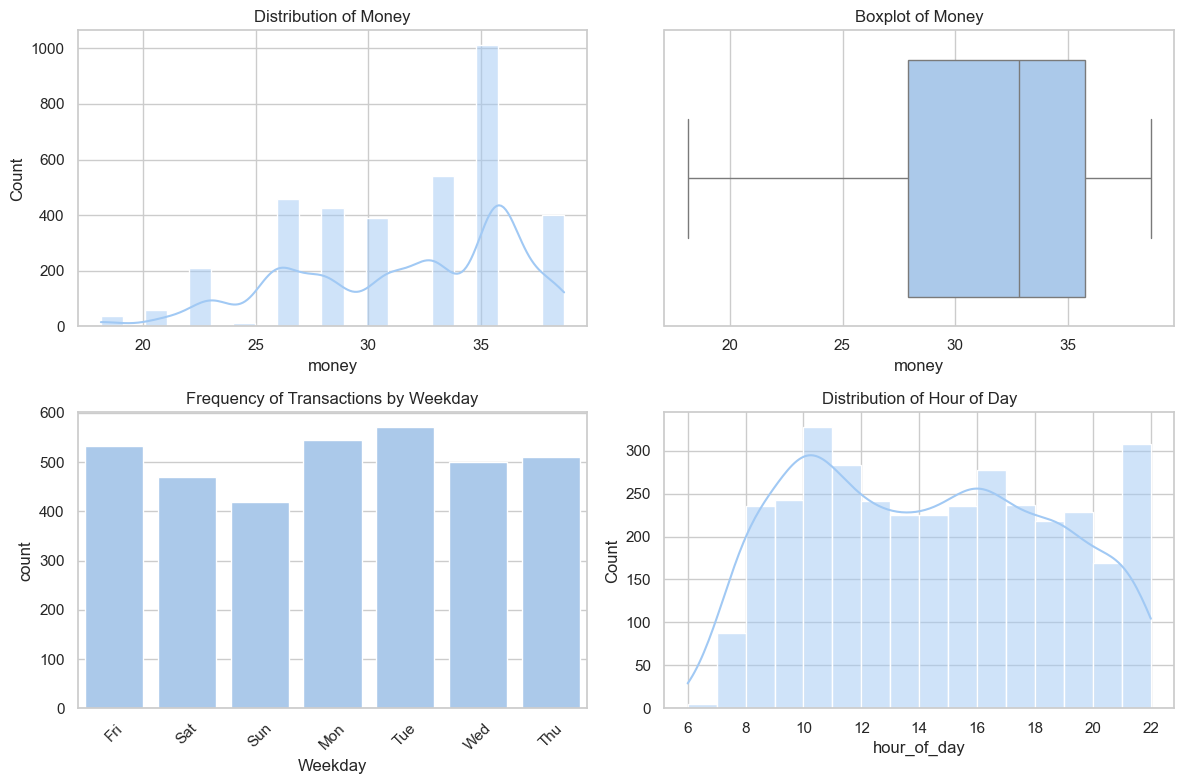

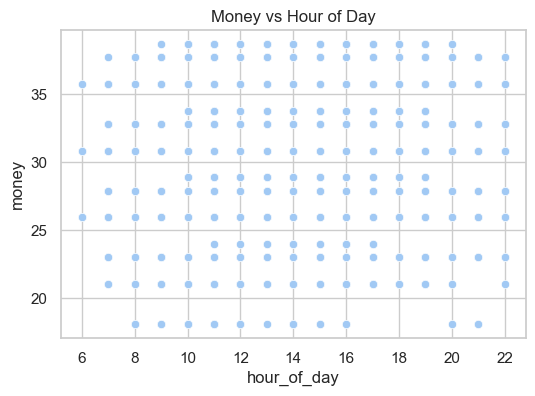

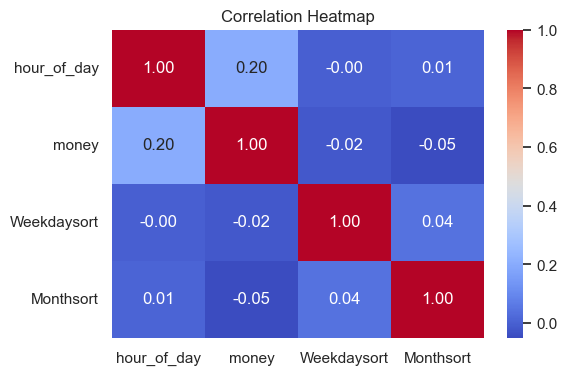

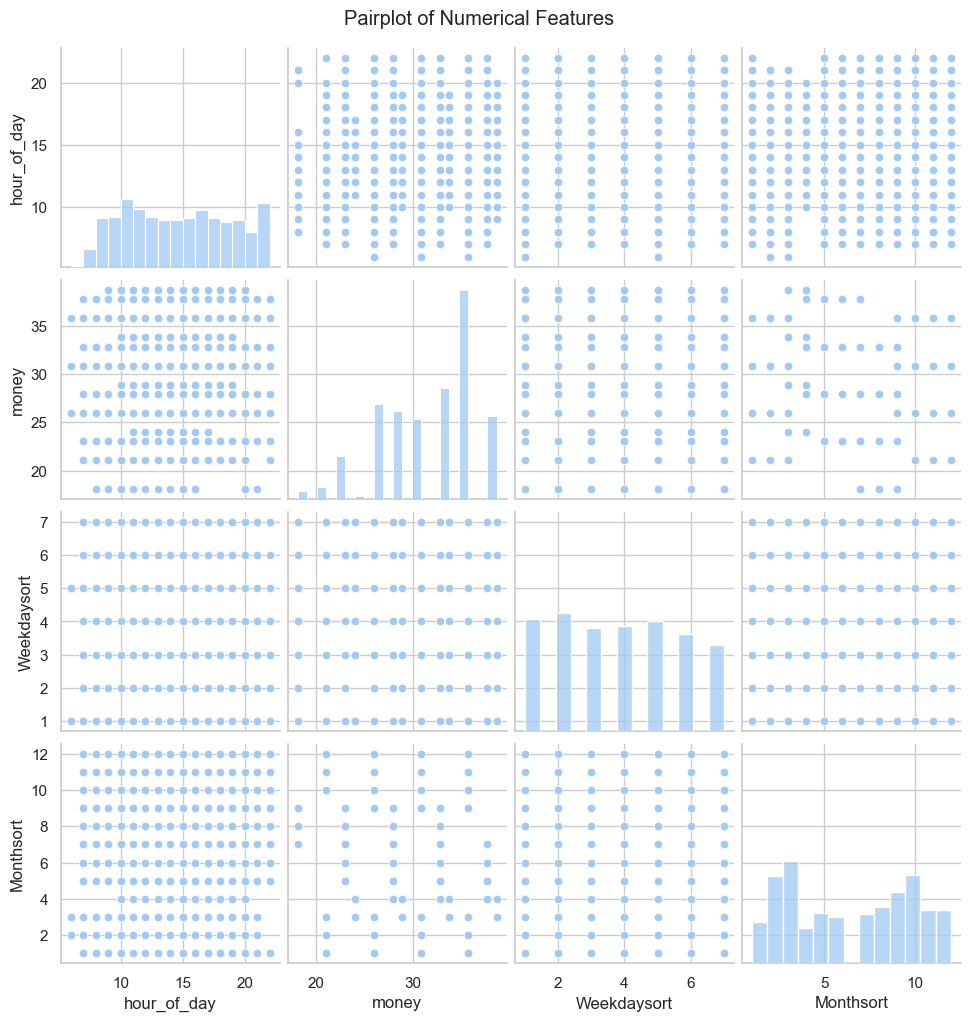

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df["money"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Money")

sns.boxplot(x=df["money"], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Money")

sns.countplot(x=df["Weekday"], ax=axes[1, 0])
axes[1, 0].set_title("Frequency of Transactions by Weekday")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.histplot(df["hour_of_day"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Hour of Day")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="hour_of_day", y="money", data=df)
plt.title("Money vs Hour of Day")
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df.select_dtypes(include=["number"]))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()
